# **주제**  
### : 신용카드 사용자 데이터를 보고 사용자의 대금 연체 정도를 예측하는 알고리즘 개발 

# **배경 및 대회 설명**
### - 신용카드사는 신용카드 신청자가 제출한 개인정보와 데이터를 활용해 신용 점수를 산정  
### - 신용카드사는 이 신용 점수를 활용해 신청자의 향후 채무 불이행과 신용카드 대금 연체 가능성을 예측  
### - 목표 : 신용카드 사용자들의 개인 신상정보 데이터로 사용자의 신용카드 대금 연체 정도를 예측

---

# **1. 변수 설명**

- index<br>
- gender: 성별<br>
- car: 차량 소유 여부<br>
- reality: 부동산 소유 여부<br>
- child_num: 자녀 수<br>
- income_total: 연간 소득<br>
- income_type: 소득 분류<br>
	['Commercial associate', 'Working', 'State servant', 'Pensioner', 'Student']<br>
- edu_type: 교육 수준<br>
	['Higher education' ,'Secondary / secondary special', 'Incomplete higher', 'Lower secondary', 'Academic degree']
- family_type: 결혼 여부<br>
	['Married', 'Civil marriage', 'Separated', 'Single / not married', 'Widow']<br>
- house_type: 생활 방식<br>
	['Municipal apartment', 'House / apartment', 'With parents', 'Co-op apartment', 'Rented apartment', 'Office apartment']<br>
- DAYS_BIRTH: 출생일<br>
	=> 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전에 태어났음을 의미<br>
- DAYS_EMPLOYED: 업무 시작일<br>
	=> 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전부터 일을 시작함을 의미<br>
	=> 양수 값은 고용되지 않은 상태를 의미함<br>
- FLAG_MOBIL: 핸드폰 소유 여부<br>
- work_phone: 업무용 전화 소유 여부<br>
- phone: 전화 소유 여부<br>
- email: 이메일 소유 여부<br>
- occyp_type: 직업 유형<br>
	[nan, 'Laborers', 'Managers', 'Sales staff','High skill tech staff', 'Core staff', 'Drivers', 'Medicine staff',<br>
       'Accountants', 'Realty agents', 'Security staff', 'Cleaning staff','Private service staff', 'Cooking staff', 'Secretaries',<br>
       'HR staff', 'IT staff', 'Low-skill Laborers','Waiters/barmen staff']<br>											
- family_size: 가족 규모<br>
- begin_month: 신용카드 발급 월<br>
	=> 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 한 달 전에 신용카드를 발급함을 의미<br>
- credit: 사용자의 신용카드 대금 연체를 기준으로 한 신용도<br>
	=> 낮을 수록 높은 신용의 신용카드 사용자를 의미함

### - FLAG_MOBIL / OCCYP_TYPE DROP

---

In [87]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

In [88]:
train = pd.read_csv('../Data/train.csv')
test = pd.read_csv('../Data/test.csv')
submission = pd.read_csv('../Data/sample_submission.csv')

---

# 0. income_total 이상치 제거하기

# 1. 연속형변수(income_total, DAYS_BIRTH, DAYS_EMPLOYED, begin_month) scaling

In [77]:
# begin_month는 12로 나눠서 scaling, days_employed / days_birth 는 365로 나눠서 스케일링

1. INCOME_TOTAL -> minmaxscaling 처리해주기

In [89]:
type(train['income_total'])

pandas.core.series.Series

In [79]:
''' def __minmaxscaler(train_column, test_column, columns_name):
    x = pd.DataFrame(train_column)
    y = pd.DataFrame(test_column)
    
    scaler = MinMaxScaler()
    
    x_scaled = scaler.fit_transform(x)
    y_scaled = scaler.transform(y)

    train[columns_name] = x_scaled
    test[columns_name] = y_scaled '''

' def __minmaxscaler(train_column, test_column, columns_name):\n    x = pd.DataFrame(train_column)\n    y = pd.DataFrame(test_column)\n    \n    scaler = MinMaxScaler()\n    \n    x_scaled = scaler.fit_transform(x)\n    y_scaled = scaler.transform(y)\n\n    train[columns_name] = x_scaled\n    test[columns_name] = y_scaled '

In [80]:
# columns_name = 'income_total'
# __minmaxscaler(train['income_total'],test['income_total'], columns_name)

In [81]:
test.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
0,26457,M,Y,N,0,112500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21990,365243,1,0,1,0,NaN,2.0,-60.0
1,26458,F,N,Y,0,135000.0,State servant,Higher education,Married,House / apartment,-18964,-8671,1,0,1,0,Core staff,2.0,-36.0
2,26459,F,N,Y,0,69372.0,Working,Secondary / secondary special,Married,House / apartment,-15887,-217,1,1,1,0,Laborers,2.0,-40.0
3,26460,M,Y,N,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-19270,-2531,1,1,0,0,Drivers,2.0,-41.0
4,26461,F,Y,Y,0,225000.0,State servant,Higher education,Married,House / apartment,-17822,-9385,1,1,0,0,Managers,2.0,-8.0


1-2. INCOME_TOTAL -> robust_scaling 처리해주기

In [90]:
def __robustscaler(train_column, test_column, columns_name):
    x = pd.DataFrame(train_column)
    y = pd.DataFrame(test_column)
    
    scaler = RobustScaler()
    
    x_scaled = scaler.fit_transform(x)
    y_scaled = scaler.transform(y)

    train[columns_name] = x_scaled
    test[columns_name] = y_scaled

In [91]:
columns_name = 'income_total'
__robustscaler(train['income_total'],test['income_total'], columns_name)

In [92]:
test.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
0,26457,M,Y,N,0,-0.434783,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21990,365243,1,0,1,0,NaN,2.0,-60.0
1,26458,F,N,Y,0,-0.217391,State servant,Higher education,Married,House / apartment,-18964,-8671,1,0,1,0,Core staff,2.0,-36.0
2,26459,F,N,Y,0,-0.851478,Working,Secondary / secondary special,Married,House / apartment,-15887,-217,1,1,1,0,Laborers,2.0,-40.0
3,26460,M,Y,N,0,-0.434783,Commercial associate,Secondary / secondary special,Married,House / apartment,-19270,-2531,1,1,0,0,Drivers,2.0,-41.0
4,26461,F,Y,Y,0,0.652174,State servant,Higher education,Married,House / apartment,-17822,-9385,1,1,0,0,Managers,2.0,-8.0


### 2. DAYS_BIRTH

In [93]:
train['DAYS_BIRTH'] = abs(train['DAYS_BIRTH'])   #음수값 처리
test['DAYS_BIRTH'] = abs(test['DAYS_BIRTH'])   #음수값 처리

### 3. DAYS_EMPLOYED

In [94]:
train['DAYS_EMPLOYED']

0       -4709
1       -1540
2       -4434
3       -2092
4       -2105
         ... 
26452   -1984
26453   -2475
26454   -2015
26455    -107
26456   -1013
Name: DAYS_EMPLOYED, Length: 26457, dtype: int64

In [95]:
train.loc[train['DAYS_EMPLOYED']>0, 'DAYS_EMPLOYED'].count()

4438

In [96]:
train.loc[train['DAYS_EMPLOYED']>0, 'DAYS_EMPLOYED']=0
test.loc[test['DAYS_EMPLOYED']>0, 'DAYS_EMPLOYED']=0

In [97]:
train.loc[train['DAYS_EMPLOYED']>0, 'DAYS_EMPLOYED'].count()

0

In [30]:
train['DAYS_EMPLOYED'] = -train['DAYS_EMPLOYED']
test['DAYS_EMPLOYED'] = -test['DAYS_EMPLOYED']

### 4. begin_month

In [98]:
train['begin_month']

0        -6.0
1        -5.0
2       -22.0
3       -37.0
4       -26.0
         ... 
26452    -2.0
26453   -47.0
26454   -25.0
26455   -59.0
26456    -9.0
Name: begin_month, Length: 26457, dtype: float64

# 2. 연속형 변수 제외한 변수 -> 범주형 변수 처리

1. occyp_type, FLAG_MOBIL DROP함

In [99]:
train = train.drop(['occyp_type','FLAG_MOBIL'], axis=1)
test = test.drop(['occyp_type','FLAG_MOBIL'], axis=1)
train.columns

Index(['index', 'gender', 'car', 'reality', 'child_num', 'income_total',
       'income_type', 'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'work_phone', 'phone', 'email', 'family_size',
       'begin_month', 'credit'],
      dtype='object')

5. phone : 전화 소유 1, 전화 무소유 0

In [100]:
train['phone'] = train['phone'].replace([1,0], ['Y','N'])
test['phone'] = test['phone'].replace([1,0], ['Y','N'])

6. email : 이메일 소유 1, 이메일 무소유 0

In [101]:
train['email'] = train['email'].replace([1,0], ['Y','N'])
test['email'] = test['email'].replace([1,0], ['Y','N'])
train['email']

0        N
1        Y
2        N
3        N
4        N
        ..
26452    N
26453    N
26454    N
26455    N
26456    N
Name: email, Length: 26457, dtype: object

7. family_size

{'whiskers': [<matplotlib.lines.Line2D at 0x186c9f4d280>,
 'caps': [<matplotlib.lines.Line2D at 0x186c9f4d9a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x186c9f3ceb0>],
 'medians': [<matplotlib.lines.Line2D at 0x186c9f59100>],
 'fliers': [<matplotlib.lines.Line2D at 0x186c9f59490>],
 'means': []}

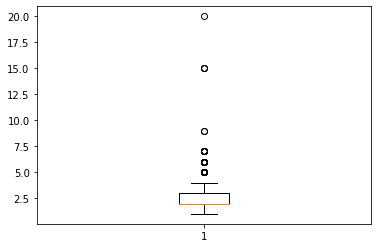

In [102]:
import matplotlib.pyplot as plt
plt.boxplot(train['family_size'])

In [103]:
num = train['family_size']
Q3 = num.quantile(0.75)
Q1 = num.quantile(0.25)
median = num.quantile(0.50)
IQR = Q3 - Q1
lower_whisker = Q1 - 1.5 * IQR           #최소값 Q1 - 1.5*IQR
upper_whisker = Q3 + 1.5 * IQR                #최댓값 Q3 + 1.5*IQR

#outlier = 최댓값 초과 또는 최솟값 미만

In [104]:
print(lower_whisker, upper_whisker)

0.5 4.5


In [105]:
max(train['family_size'])

20.0

In [106]:
train.loc[(train['family_size']> upper_whisker) | (train['family_size'] < lower_whisker), 'family_size'] = upper_whisker

In [107]:
""" num = train['family_size']
q1 = num.quantile(0.20)
q2 = num.quantile(0.40)
q3 = num.quantile(0.60)
q4 = num.quantile(0.80)
q5 = num.quantile(1)
print(q1,q2,q3,q4,q5) """

" num = train['family_size']\nq1 = num.quantile(0.20)\nq2 = num.quantile(0.40)\nq3 = num.quantile(0.60)\nq4 = num.quantile(0.80)\nq5 = num.quantile(1)\nprint(q1,q2,q3,q4,q5) "

In [108]:
min(train['family_size'])

1.0

In [109]:
train['family_size'] = pd.cut(train['family_size'], bins=4, labels=['a','b','c','d'])
test['family_size'] = pd.cut(test['family_size'], bins=4, labels=['a','b','c','d'])

In [110]:
train['family_size'].value_counts()

b    14106
a     5109
c     4632
d     2610
Name: family_size, dtype: int64

In [111]:
test['family_size'].value_counts()

a    7235
b    2635
c     106
d      24
Name: family_size, dtype: int64

In [112]:
train['family_size']

0        b
1        c
2        b
3        b
4        b
        ..
26452    d
26453    b
26454    b
26455    a
26456    b
Name: family_size, Length: 26457, dtype: category
Categories (4, object): ['a' < 'b' < 'c' < 'd']

9. child_num 

In [113]:
train['child_num'].value_counts()

0     18340
1      5386
2      2362
3       306
4        47
5        10
14        3
7         2
19        1
Name: child_num, dtype: int64

In [114]:
train.loc[train['child_num']>=1,'child_num'] = 1
test.loc[test['child_num']>=1,'child_num'] = 1

In [115]:
train['child_num'].value_counts()

0    18340
1     8117
Name: child_num, dtype: int64

In [116]:
train['child_num'] = train['child_num'].replace([1,0],['Y','N'])
test['child_num'] = test['child_num'].replace([1,0],['Y','N'])

In [117]:
train['child_num']

0        N
1        Y
2        N
3        N
4        N
        ..
26452    Y
26453    Y
26454    N
26455    N
26456    N
Name: child_num, Length: 26457, dtype: object

10. work_phone

In [118]:
train['work_phone'] = train['work_phone'].replace([1,0],['Y','N'])
test['work_phone'] = test['work_phone'].replace([1,0],['Y','N'])

In [119]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   index          26457 non-null  int64   
 1   gender         26457 non-null  object  
 2   car            26457 non-null  object  
 3   reality        26457 non-null  object  
 4   child_num      26457 non-null  object  
 5   income_total   26457 non-null  float64 
 6   income_type    26457 non-null  object  
 7   edu_type       26457 non-null  object  
 8   family_type    26457 non-null  object  
 9   house_type     26457 non-null  object  
 10  DAYS_BIRTH     26457 non-null  int64   
 11  DAYS_EMPLOYED  26457 non-null  int64   
 12  work_phone     26457 non-null  object  
 13  phone          26457 non-null  object  
 14  email          26457 non-null  object  
 15  family_size    26457 non-null  category
 16  begin_month    26457 non-null  float64 
 17  credit         26457 non-null  

### 11. income_type

In [120]:
train['income_type'].unique()

array(['Commercial associate', 'Working', 'State servant', 'Pensioner',
       'Student'], dtype=object)

In [121]:
train['income_type'].value_counts()

Working                 13645
Commercial associate     6202
Pensioner                4449
State servant            2154
Student                     7
Name: income_type, dtype: int64

In [122]:
train['income_type'] = train['income_type'].replace({'Student' : 'Pensioner'})
test['income_type'] = test['income_type'].replace({'Student' : 'Pensioner'})

In [123]:
train['income_type'].value_counts()

Working                 13645
Commercial associate     6202
Pensioner                4456
State servant            2154
Name: income_type, dtype: int64

### 12. edu_type    중등 / 고등 / 중졸 / 초졸 / 학.석.박  

In [124]:
train['edu_type'].value_counts()

Secondary / secondary special    17995
Higher education                  7162
Incomplete higher                 1020
Lower secondary                    257
Academic degree                     23
Name: edu_type, dtype: int64

In [125]:
train['edu_type'] = train['edu_type'].replace({'Academic degree' : 'Higher education'})
train['edu_type'] = train['edu_type'].replace({'Lower secondary' : 'Incomplete higher'})

test['edu_type'] = test['edu_type'].replace({'Academic degree' : 'Higher education'})
test['edu_type'] = test['edu_type'].replace({'Lower secondary' : 'Incomplete higher'})

In [126]:
train['edu_type'].value_counts()
test['edu_type'].value_counts()

Secondary / secondary special    6782
Higher education                 2711
Incomplete higher                 507
Name: edu_type, dtype: int64

### 13. house_type
House / apartment<br>     
With parents<br>            
Municipal apartment<br>  시립아파트
Rented apartment<br>  임대아파트      
Office apartment<br>  오피스텔       
Co-op apartment<br>  협동?

In [127]:
train['house_type'].unique()

array(['Municipal apartment', 'House / apartment', 'With parents',
       'Co-op apartment', 'Rented apartment', 'Office apartment'],
      dtype=object)

In [128]:
train['house_type'].value_counts()

House / apartment      23653
With parents            1257
Municipal apartment      818
Rented apartment         429
Office apartment         190
Co-op apartment          110
Name: house_type, dtype: int64

In [129]:
train['house_type'] = train['house_type'].replace({'Co-op apartment' : 'Office apartment'})
train['house_type'] = train['house_type'].replace({'Rented apartment' : 'Municipal apartment'})

test['house_type'] = test['house_type'].replace({'Co-op apartment' : 'Office apartment'})
test['house_type'] = test['house_type'].replace({'Rented apartment' : 'Municipal apartment'})

In [130]:
train['house_type'].value_counts()

House / apartment      23653
With parents            1257
Municipal apartment     1247
Office apartment         300
Name: house_type, dtype: int64

In [131]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   index          26457 non-null  int64   
 1   gender         26457 non-null  object  
 2   car            26457 non-null  object  
 3   reality        26457 non-null  object  
 4   child_num      26457 non-null  object  
 5   income_total   26457 non-null  float64 
 6   income_type    26457 non-null  object  
 7   edu_type       26457 non-null  object  
 8   family_type    26457 non-null  object  
 9   house_type     26457 non-null  object  
 10  DAYS_BIRTH     26457 non-null  int64   
 11  DAYS_EMPLOYED  26457 non-null  int64   
 12  work_phone     26457 non-null  object  
 13  phone          26457 non-null  object  
 14  email          26457 non-null  object  
 15  family_size    26457 non-null  category
 16  begin_month    26457 non-null  float64 
 17  credit         26457 non-null  

In [132]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   index          10000 non-null  int64   
 1   gender         10000 non-null  object  
 2   car            10000 non-null  object  
 3   reality        10000 non-null  object  
 4   child_num      10000 non-null  object  
 5   income_total   10000 non-null  float64 
 6   income_type    10000 non-null  object  
 7   edu_type       10000 non-null  object  
 8   family_type    10000 non-null  object  
 9   house_type     10000 non-null  object  
 10  DAYS_BIRTH     10000 non-null  int64   
 11  DAYS_EMPLOYED  10000 non-null  int64   
 12  work_phone     10000 non-null  object  
 13  phone          10000 non-null  object  
 14  email          10000 non-null  object  
 15  family_size    10000 non-null  category
 16  begin_month    10000 non-null  float64 
dtypes: category(1), float64(2), int6

In [133]:
train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month,credit
0,0,F,N,N,N,0.434783,Commercial associate,Higher education,Married,Municipal apartment,13899,-4709,N,N,N,b,-6.0,1.0
1,1,F,N,Y,Y,0.869565,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,11380,-1540,N,N,Y,c,-5.0,1.0
2,2,M,Y,Y,N,2.826087,Working,Higher education,Married,House / apartment,19087,-4434,N,Y,N,b,-22.0,2.0
3,3,F,N,Y,N,0.434783,Commercial associate,Secondary / secondary special,Married,House / apartment,15088,-2092,N,Y,N,b,-37.0,0.0
4,4,F,Y,Y,N,0.000000,State servant,Higher education,Married,House / apartment,15037,-2105,N,N,N,b,-26.0,2.0


# 3. 중복데이터 제거

In [ ]:
# train['identity'] = [str(i) + str(j) + str(k) + str(l) + str(m) for i,j,k,l,m in zip(train['gender'],train['income_total'],train['income_type'],train['DAYS_BIRTH'],train['DAYS_EMPLOYED'])]
# test['identity'] = [str(i) + str(j) + str(k) + str(l) + str(m) for i,j,k,l,m in zip(test['gender'],test['income_total'],test['income_type'],test['DAYS_BIRTH'],test['DAYS_EMPLOYED'])]

# print(f"train set 중복데이터가 아닌 사람의 수 : {sum(train['identity'].value_counts()==1)}명")
# print(f"test set 중복데이터가 아닌 사람의 수 : {sum(test['identity'].value_counts()==1)}명")
# print('-'*60)
# print(f"train set 동일인물의 중복데이터로 추정되는 사람의 수 : {sum(train['identity'].value_counts()>=2)}명")
# print(f"test set 동일인물의 중복데이터로 추정되는 사람의 수 : {sum(test['identity'].value_counts()>=2)}명")

In [134]:
train_x = train.drop(['index', 'credit'], axis =1)
test_x = test.drop('index', axis = 1)
train_y = train[['credit']]

In [135]:
print(train_x.shape, train_y.shape, test_x.shape)

(26457, 16) (26457, 1) (10000, 16)


In [136]:
train_x = pd.get_dummies(train_x, drop_first= True)
test_x = pd.get_dummies(test_x, drop_first= True)
type(train_x)
train_x
test_x
#train_x 형태 확인하기 위해 dataframe형태로 변환
# train_x = pd.DataFrame(train_x)
# train_x

,income_total,DAYS_BIRTH,DAYS_EMPLOYED,begin_month,gender_M,car_Y,reality_Y,child_num_Y,income_type_Pensioner,income_type_State servant,...,family_type_Widow,house_type_Municipal apartment,house_type_Office apartment,house_type_With parents,work_phone_Y,phone_Y,email_Y,family_size_b,family_size_c,family_size_d
0,-0.434783,21990,0,-60.0,1,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,-0.217391,18964,-8671,-36.0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,-0.851478,15887,-217,-40.0,0,0,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0
3,-0.434783,19270,-2531,-41.0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0.652174,17822,-9385,-8.0,0,1,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.434783,18593,-5434,-19.0,0,1,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0
9996,0.434783,10886,-1315,-34.0,1,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9997,1.304348,21016,-14018,-55.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0.217391,16541,-1085,-33.0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [137]:
train_x

,income_total,DAYS_BIRTH,DAYS_EMPLOYED,begin_month,gender_M,car_Y,reality_Y,child_num_Y,income_type_Pensioner,income_type_State servant,...,family_type_Widow,house_type_Municipal apartment,house_type_Office apartment,house_type_With parents,work_phone_Y,phone_Y,email_Y,family_size_b,family_size_c,family_size_d
0,0.434783,13899,-4709,-6.0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,0.869565,11380,-1540,-5.0,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,1,0
2,2.826087,19087,-4434,-22.0,1,1,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3,0.434783,15088,-2092,-37.0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4,0.000000,15037,-2105,-26.0,0,1,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,0.652174,12079,-1984,-2.0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
26453,0.217391,15291,-2475,-47.0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
26454,1.304348,10082,-2015,-25.0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
26455,0.130435,10145,-107,-59.0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [138]:
train_x.columns

Index(['income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'begin_month',
       'gender_M', 'car_Y', 'reality_Y', 'child_num_Y',
       'income_type_Pensioner', 'income_type_State servant',
       'income_type_Working', 'edu_type_Incomplete higher',
       'edu_type_Secondary / secondary special', 'family_type_Married',
       'family_type_Separated', 'family_type_Single / not married',
       'family_type_Widow', 'house_type_Municipal apartment',
       'house_type_Office apartment', 'house_type_With parents',
       'work_phone_Y', 'phone_Y', 'email_Y', 'family_size_b', 'family_size_c',
       'family_size_d'],
      dtype='object')

In [139]:
train_y


# type(train_y)
# series_train_y = train_y.squeeze()
# series_train_y2 = series_train_y.ravel()
# type(series_train_y2)

,credit
0,1.0
1,1.0
2,2.0
3,0.0
4,2.0
...,...
26452,1.0
26453,2.0
26454,2.0
26455,2.0


In [140]:
from sklearn.model_selection import train_test_split

In [74]:
#lgbm

from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import f1_score
from tensorflow.keras.utils import to_categorical

X_train, X_val, y_train, y_val = train_test_split(train_x, train_y, 
                                                    stratify=train_y, test_size=0.25,
                                                    random_state = 10086)

print("Train set: ")
print(X_train.shape)
print(y_train.shape)
print("===========")
print("Validation set: ")
print(X_val.shape)
print(y_val.shape)


lgbm_clf=LGBMClassifier()
lgbm_clf.fit(X_train, y_train.values.ravel())
y_pred=lgbm_clf.predict_proba(X_val)

print(f"lgbm_log_loss: {log_loss(to_categorical(y_val['credit']), y_pred)}")

Train set: 
(19842, 26)
(19842, 1)
Validation set: 
(6615, 26)
(6615, 1)
lgbm_log_loss: 0.761427372770255


In [167]:
y_val

,credit
36,2.0
3464,2.0
2640,2.0
22500,1.0
17275,1.0
...,...
6806,1.0
23096,2.0
7756,2.0
23331,2.0


In [168]:
y_pred

array([[2.],
       [2.],
       [2.],
       ...,
       [2.],
       [2.],
       [2.]])

In [141]:
#catboost
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix
from sklearn.metrics import f1_score
from tensorflow.keras.utils import to_categorical
X_train, X_val, y_train, y_val = train_test_split(train_x, train_y, 
                                                    stratify=train_y, test_size=0.25,
                                                    random_state = 10086)

print("Train set: ")
print(X_train.shape)
print(y_train.shape)
print("===========")
print("Validation set: ")
print(X_val.shape)
print(y_val.shape)



#param 조금 수정함 -> 오버피팅 개심함.. 왜지?ㅠㅠ
""" cat_clf=CatBoostClassifier(n_estimators=3000, max_depth=8, random_seed=1042, learning_rate=0.04, bootstrap_type ='Bernoulli')
cat_clf.fit(X_train, y_train,early_stopping_rounds=50,silent = True) """
cat_clf=CatBoostClassifier()
cat_clf.fit(X_train, y_train)



#y_pred=cat_clf.predict_proba(X_val)
#proba : 확률로 만듬

y_pred=cat_clf.predict_proba(X_val)

print(f"cat_log_loss: {log_loss(to_categorical(y_val['credit']), y_pred)}")


Train set: 
(19842, 26)
(19842, 1)
Validation set: 
(6615, 26)
(6615, 1)
Learning rate set to 0.092151
0:	learn: 1.0464098	total: 146ms	remaining: 2m 25s
1:	learn: 1.0051289	total: 153ms	remaining: 1m 16s
2:	learn: 0.9718371	total: 159ms	remaining: 52.8s
3:	learn: 0.9449421	total: 166ms	remaining: 41.5s
4:	learn: 0.9228898	total: 175ms	remaining: 34.7s
5:	learn: 0.9045849	total: 181ms	remaining: 30s
6:	learn: 0.8893852	total: 190ms	remaining: 27s
7:	learn: 0.8760589	total: 199ms	remaining: 24.6s
8:	learn: 0.8648739	total: 207ms	remaining: 22.8s
9:	learn: 0.8560839	total: 217ms	remaining: 21.5s
10:	learn: 0.8479562	total: 225ms	remaining: 20.2s
11:	learn: 0.8418838	total: 233ms	remaining: 19.2s
12:	learn: 0.8358901	total: 241ms	remaining: 18.3s
13:	learn: 0.8309006	total: 257ms	remaining: 18.1s
14:	learn: 0.8265194	total: 268ms	remaining: 17.6s
15:	learn: 0.8229826	total: 277ms	remaining: 17s
16:	learn: 0.8196390	total: 284ms	remaining: 16.4s
17:	learn: 0.8171187	total: 293ms	remaining:

C:\Users\sally\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


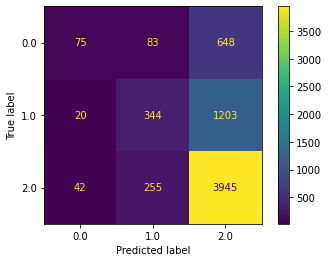

In [197]:
# from sklearn.metrics import plot_confusion_matrix
# plot_confusion_matrix(cat_clf, X_val, y_val)  
# plt.show()

In [91]:
# feature_importance_in_catboost
import matplotlib.pyplot as plt

cat_clf.get_feature_importance()
plt.figure(figsize=(12,15))
plt.barh(X_train.columns, cat_clf.get_feature_importance())

AttributeError: 'LGBMClassifier' object has no attribute 'get_feature_importance'

In [142]:
from sklearn.model_selection import KFold, StratifiedKFold

def run_kfold(clf):
    folds=StratifiedKFold(n_splits=5, shuffle=True, random_state=55)
    outcomes=[]
    sub=np.zeros((test_x.shape[0], 3))  
    for n_fold, (train_index, val_index) in enumerate(folds.split(train_x, train_y)):
        X_train, X_val = train_x.iloc[train_index], train_x.iloc[val_index]
        y_train, y_val = train_y.iloc[train_index], train_y.iloc[val_index]
        clf.fit(X_train, y_train.values.ravel())
        
        predictions=clf.predict_proba(X_val)
       
        logloss=log_loss(to_categorical(y_val['credit']), predictions)
        outcomes.append(logloss)
        print(f"FOLD {n_fold} : logloss:{logloss}")
        
        sub+=clf.predict_proba(test_x)
        
        
    mean_outcome=np.mean(outcomes)
    
    print("Mean:{}".format(mean_outcome))
    return sub/folds.n_splits

my_submission = run_kfold(cat_clf)

Learning rate set to 0.092455
0:	learn: 1.0464114	total: 11.4ms	remaining: 11.4s
1:	learn: 1.0051049	total: 32.5ms	remaining: 16.2s
2:	learn: 0.9720964	total: 43.9ms	remaining: 14.6s
3:	learn: 0.9452787	total: 55.2ms	remaining: 13.7s
4:	learn: 0.9233476	total: 65.7ms	remaining: 13.1s
5:	learn: 0.9052183	total: 77.3ms	remaining: 12.8s
6:	learn: 0.8900924	total: 88.2ms	remaining: 12.5s
7:	learn: 0.8766643	total: 98.3ms	remaining: 12.2s
8:	learn: 0.8654720	total: 110ms	remaining: 12.1s
9:	learn: 0.8569419	total: 122ms	remaining: 12.1s
10:	learn: 0.8488648	total: 133ms	remaining: 11.9s
11:	learn: 0.8419039	total: 143ms	remaining: 11.8s
12:	learn: 0.8358813	total: 156ms	remaining: 11.9s
13:	learn: 0.8309712	total: 168ms	remaining: 11.9s
14:	learn: 0.8267169	total: 182ms	remaining: 11.9s
15:	learn: 0.8231476	total: 198ms	remaining: 12.2s
16:	learn: 0.8198818	total: 217ms	remaining: 12.5s
17:	learn: 0.8175606	total: 234ms	remaining: 12.8s
18:	learn: 0.8151911	total: 252ms	remaining: 13s
19:	l

C:\Users\sally\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


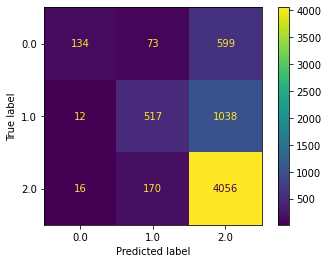

In [200]:
plot_confusion_matrix(cat_clf, X_val, y_val)  
plt.show()

In [205]:
""" from sklearn import tree
cat_clf = tree.DecisionTreeClassifier(random_state=0)
tree.plot_tree(cat_clf) """

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [202]:
import graphviz
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
#from sklearn.datasets import load_iris
#from sklearn.model_selection import train_test_split
import warnings

In [ ]:
"""  export_graphviz(cat_clf, out_file="tree.dot", class_names=iris_data.target_names, 
               feature_names = iris_data.feature_names, impurity=True, filled=True)"""

In [143]:
submission.loc[:,1:] = my_submission

C:\Users\sally\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:719: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  indexer = self._get_setitem_indexer(key)


In [144]:
submission.to_csv('../Data/catboost_robust_HJ4.csv', index= False)